<center> <h1> <b>BIRDSONGS<b></h1> </center>
<center> <h1>Syllable Tutorial</h1> </center>

# Define Objects

Import package and define matplotlib backend

In [7]:
# the following line enable interact with figures,  
# you can make zoom and save images from a poup matplotlib window
# to select points: qt ipympl tk. To just visualize: notebook
%matplotlib ipympl

import birdsongs as bs
from birdsongs.util import *

Define directories path and show audio files

In [13]:
#audios = "..\\..\\audios\\"
root    = "../examples/" # "path\\to\\repository\\' 
audios  = 'audios'       # "path\\to\\audios\\'
results = "results"      # "path\\to\\results\\'

paths  = bs.Paths(root, audios, results, catalog=False)      # root_path, audios_path, catalog
ploter = bs.Ploter(save=True)   # to save figures save=True 
paths.ShowFiles(True)#[['ML Catalog Number', 'Scientific Name', 'Year', 'Country-State-County', 'Country', 'State', 'Locality', 'Altitude']].head()


The folder has 8 songs:


['XC104508 - Ocellated Tapaculo - Acropternis orthonyx.wav',
 'XC11293 - Rufous-collared Sparrow - Zonotrichia capensis.wav',
 'XC260851 - Ocellated Tapaculo - Acropternis orthonyx infuscatus.wav',
 'XC388622 - Ocellated Tapaculo - Acropternis orthonyx.wav',
 'XC428484 - Ocellated Tapaculo - Acropternis orthonyx.wav',
 '287551951.mp3',
 'XC260851 - Ocellated Tapaculo - Acropternis orthonyx infuscatus.mp3',
 'XC388622 - Ocellated Tapaculo - Acropternis orthonyx.mp3']

In [16]:
file_path = [file for file in paths.sound_files if "XC388622" in str(file)][0]
librosa.load(file_path, sr=None) 
#file_path

(array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         9.1552734e-05, -3.0517578e-05, -3.0517578e-05], dtype=float32),
 48000)

Dealing with several audio files and csv metadata

In [ ]:
#selected = paths.AudioFiles(False)[(paths.AudioFiles(False)['Country'] == 'Brazil')][['ML Catalog Number', 'Scientific Name', 'Year', 'Country-State-County', 'Country', 'State', 'Locality', 'Latitude']]
#selected = selected[(paths.AudioFiles(False)['State'] != 'Lima')]#[['ML Catalog Number', 'Scientific Name', 'Year', 'Country-State-County', 'Country', 'State', 'Locality', 'Latitude']]
#selected#["State"]#.iloc[0]["ML Catalog Number"]
#print(len(selected))

In [ ]:
#paths.AudioFiles().loc[paths.AudioFiles()['Country'] == 'Argentina']

Define, visualize and hear birdsong. The same funcion allow to us select the time of interest enabling SelectTime_on option

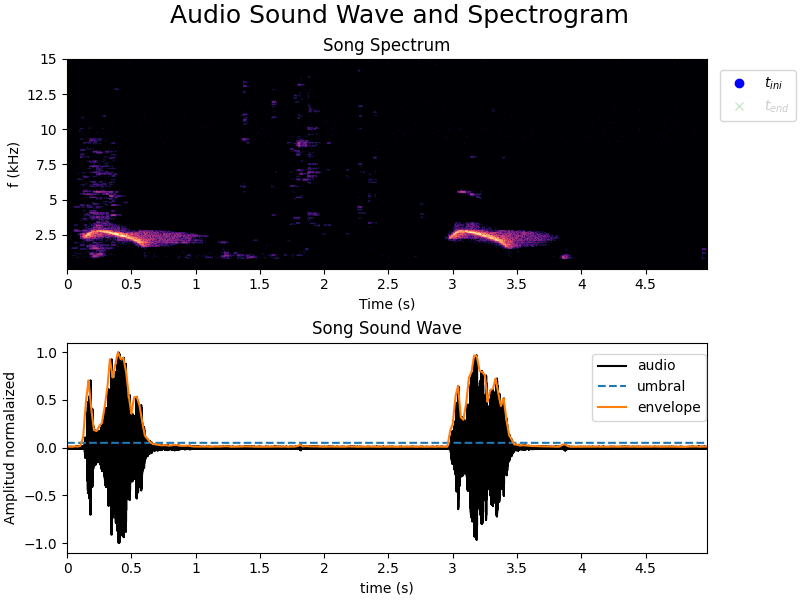

In [18]:
birdsong = bs.BirdSong(paths, file_id="XC388622", tlim=(0,5),# dict=["Col", "DC"],
                       Nt=1000, NN=1024, flim=(1e2,15e3) 
                       )
print(birdsong.state, birdsong.country)
ploter.Plot(birdsong, FF_on=False, SelectTime_on=True)
AudioPlay(birdsong)

In [38]:
#ime_interval = np.array([2.9707, 3.4204])
time_interval = Positions(ploter.klicker)[0]
print("Time interval selected: initial time {:.4f} s, final time {:.4f} s".format(time_interval[0], time_interval[1]))

Time interval selected: initial time 2.9707 s, final time 3.4204 s


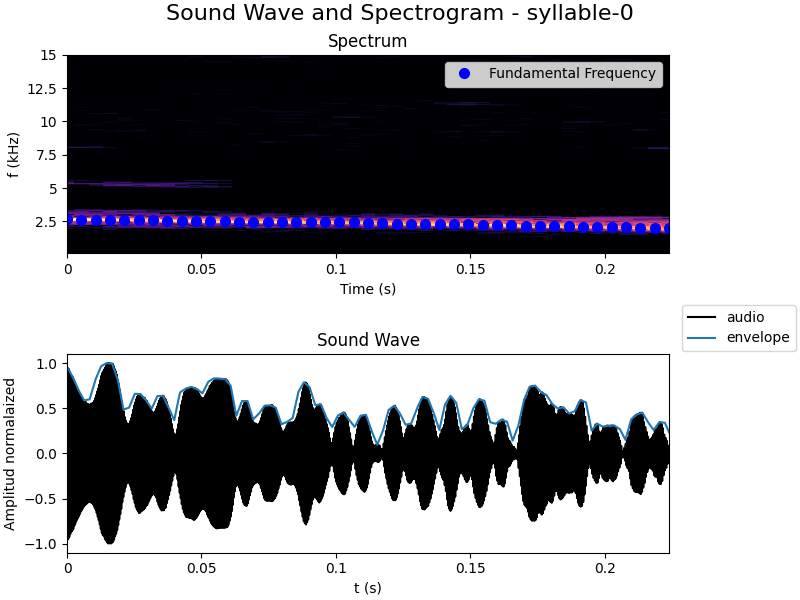

In [37]:
syllable = bs.Syllable(birdsong, tlim=time_interval, umbral_FF=1.05, no_syllable=0, type="intro-down")
ploter.Plot(syllable, FF_on=True)
AudioPlay(syllable)

In [ ]:
#plt.figure(); plt.plot(syllable.FF, 'o'); plt.show(); plt.ylim((0, 3.5e4));
#syllable.FF

3D plot (in process)

In [ ]:
#ploter.Plot3d(birdsong)

In [ ]:
ploter.Plot(birdsong, FF_on=False, syllable=syllable)

Define syllable with the default syllable extractor

In [ ]:
# no_syllable    = int(input("Enter the syllable number (1 to {0}): ".format(bird.no_syllables)))
# syllable       = birdsong.Syllable(no_syllable=3)
# ploter.Plot(syllable)
# AudioPlay(syllable)

In [ ]:
# ploter.Plot(birdsong, FF_on=False, syllable_on=True, chunck_on=False)

# Optimal Synthetic Syllable

Define optimization method and its parameters 

In [62]:
brute     = {'method':'brute', 'Ns':21}  # , "workers":-1
optimizer = bs.Optimizer(syllable, method_kwargs=brute)
#?lmfit.minimize

Find optimal $\gamma$ for all the syllables computed by the syllables extractor. You can also just find the optimal for the single syllable

In [63]:
optimal_gamma = optimizer.OptimalGamma(syllable)
#optimal_gamma = 37000 # optimizer.AllGammas(birdsong)
syllable.p["gm"].set(value=optimal_gamma)

γ* =  37000, t=3.8576 min


In [64]:
syllable.p

name,value,initial value,min,max,vary
a0,0.22600000,0.11,0.01000000,0.25000000,False
a1,0.00000000,0.0,-2.00000000,2.00000000,False
a2,0.00000000,0.0,0.00000000,2.00000000,False
b0,-0.25000000,-0.1,-1.00000000,0.50000000,False
b1,0.80000000,1,0.00000000,2.00000000,False
b2,0.90000000,0.0,0.00000000,2.00000000,False
gm,37000.0000,40000.0,10000.0000,100000.000,False


Optimal $\alpha$ and $\beta$

In [65]:
#              [a0, a1, a2, b0, b1, b2]
#syllable.Set([0.154, 0, 0, -0.4, 1, 1.4])
# syllable.p["b2"].set(value=2)

In [66]:
optimizer.OptimalParams(syllable, Ns=21)

As
$a_0*$=0.2020, t=4.1320 min
Bs


Display optimal parameters and generate a synthetic syllable 

In [60]:
Display(syllable.p)
synth_syllable = syllable.Solve(syllable.p)

name,value,initial value,min,max,vary
a0,0.22600000,0.11,0.01000000,0.25000000,False
a1,0.00000000,0.0,-2.00000000,2.00000000,False
a2,0.00000000,0.0,0.00000000,2.00000000,False
b0,-0.25000000,-0.1,-1.00000000,0.50000000,False
b1,0.80000000,1,0.00000000,2.00000000,False
b2,0.90000000,0.0,0.00000000,2.00000000,False
gm,37000.0000,40000.0,10000.0000,100000.000,False


Visualize and plot the synthetic syllable

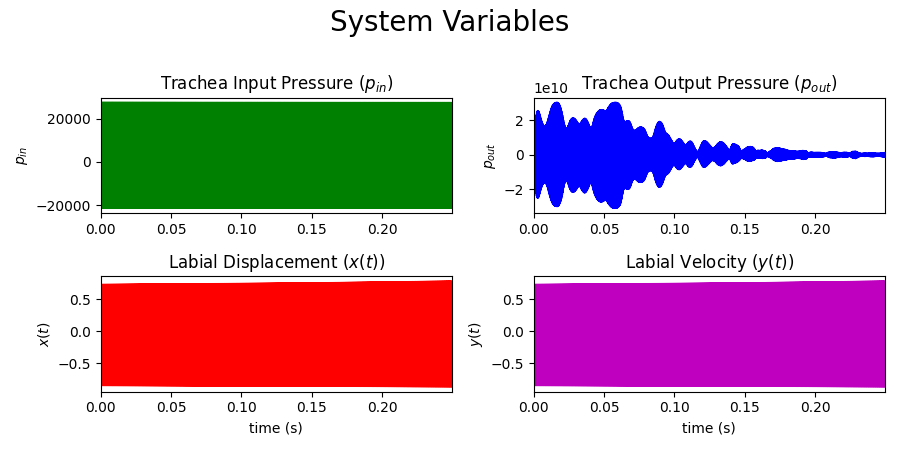

In [53]:
ploter.PlotVs(synth_syllable);

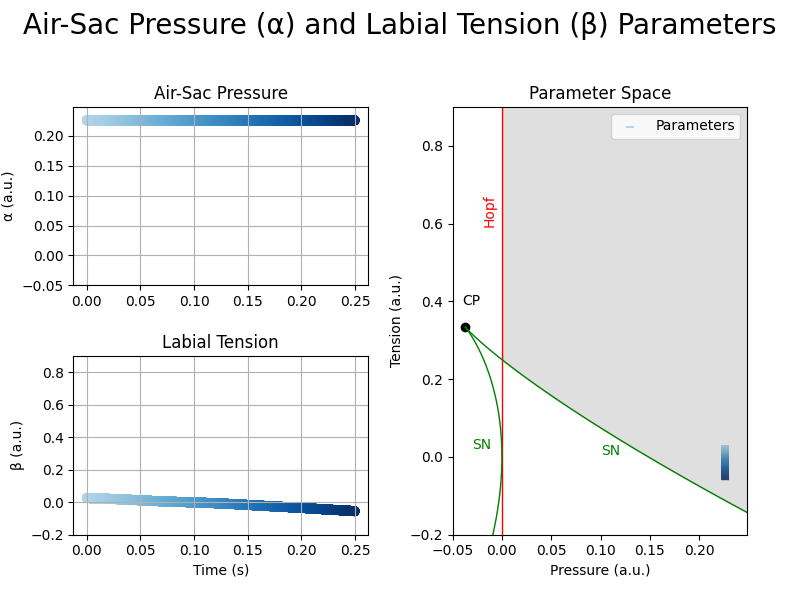

In [54]:
ploter.PlotAlphaBeta(synth_syllable);

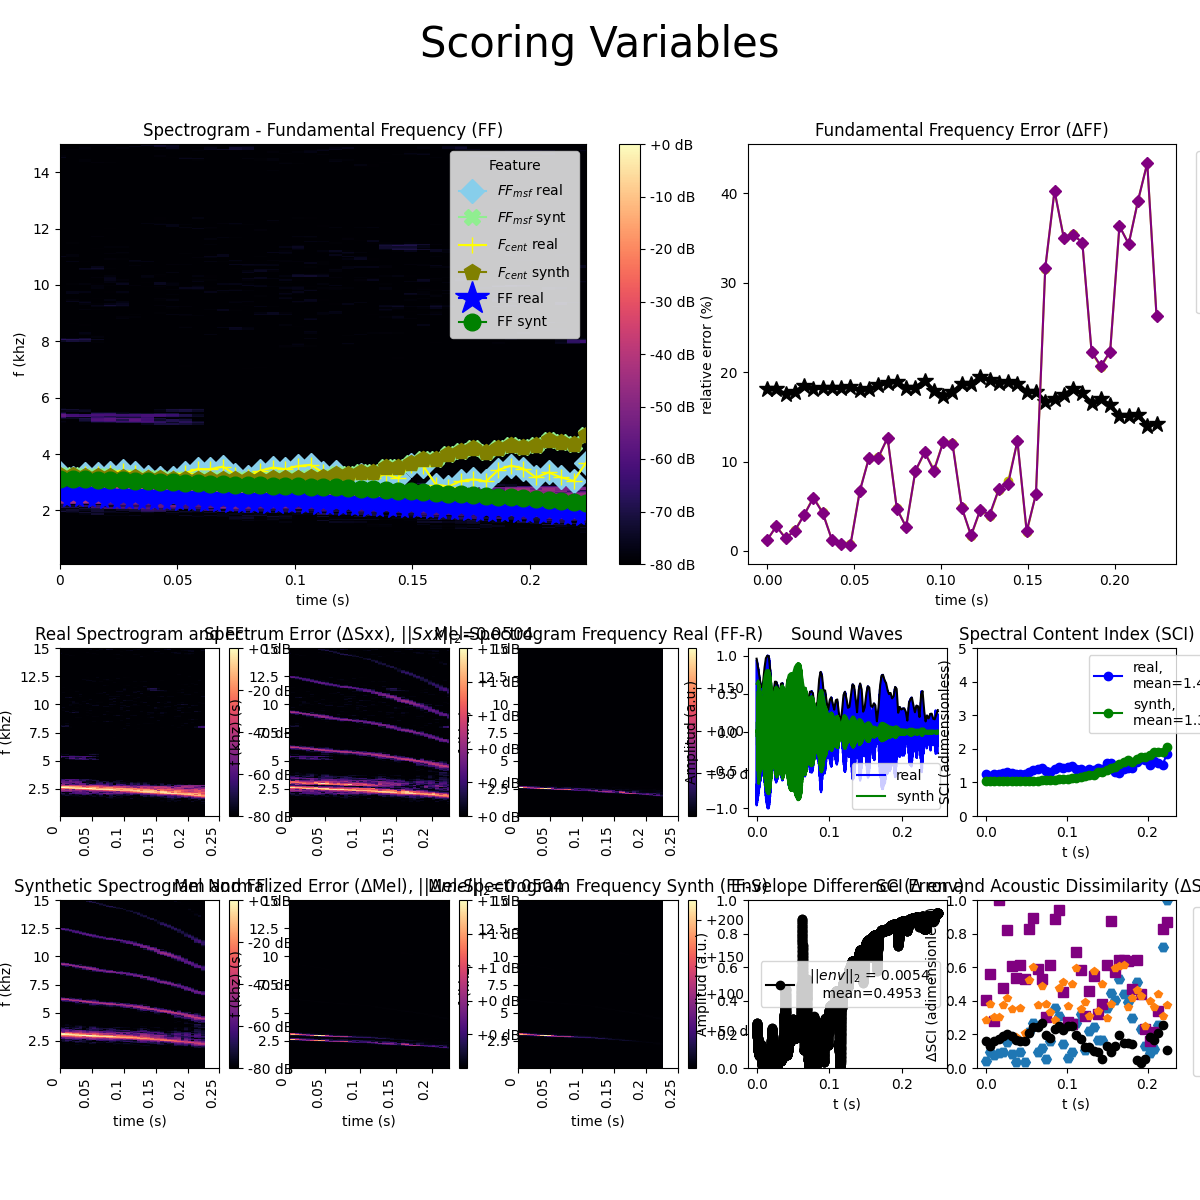

In [61]:
ploter.Result(syllable, synth_syllable, figsize=(12,12));

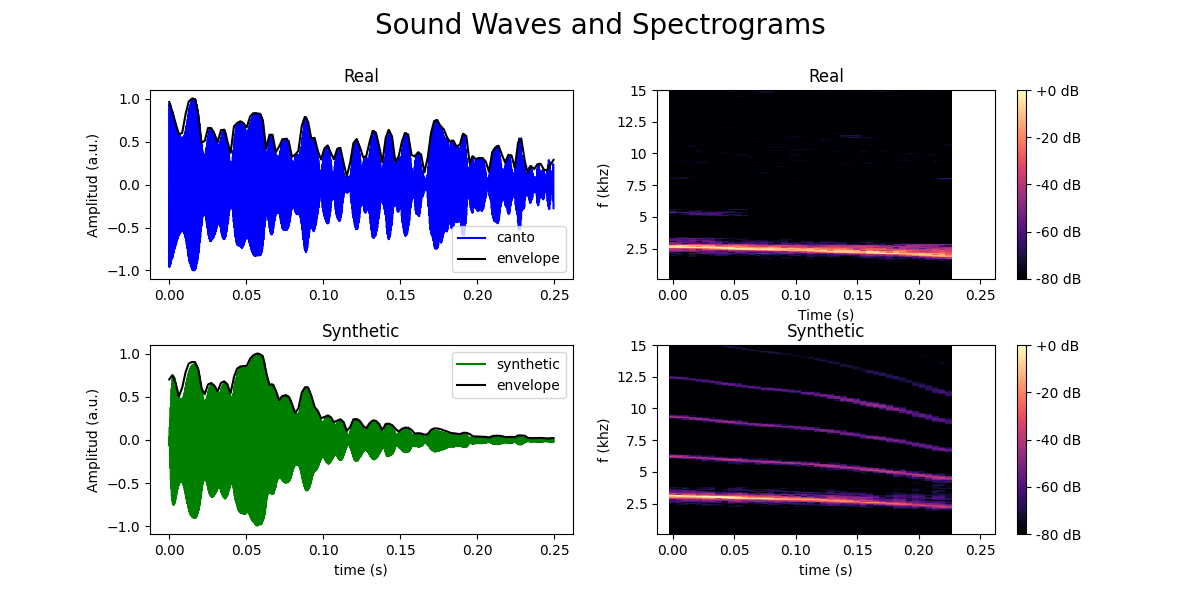

In [56]:
ploter.Syllables(syllable, synth_syllable);

In [57]:
AudioPlay(syllable)

In [58]:
AudioPlay(synth_syllable)

Write synthetic and real syllables

In [59]:
syllable.ExportMotorGestures()
syllable.WriteAudio();  synth_syllable.WriteAudio();

C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\maad\sound\input_output.py:390: UserWarning: Values for bit depth should be 8, 16 or 32. Argument ignored.
  warn('Values for bit depth should be 8, 16 or 32. Argument ignored.')
